In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.signal as signal

In [3]:
data_dir = '/mnt/sdb/data/Openedsdata2020/openEDS2020-GazePrediction/train/sequences/' #6873/000.png'
directories = os.listdir(data_dir)

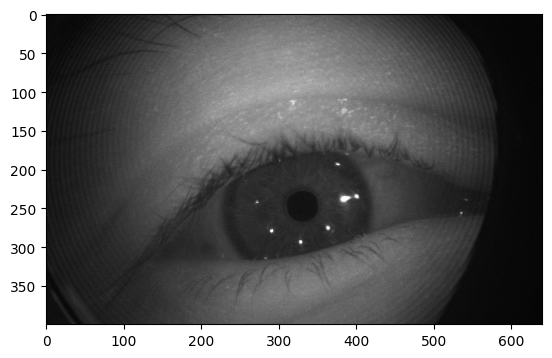

In [8]:
total_data = []
num_sequence = 10

for sequence in os.listdir(data_dir):
	for image in os.listdir(data_dir + sequence):
		img = plt.imread(data_dir + sequence + '/' + image)
		# plt.imshow(img, cmap='gray')
		total_data += img.flatten().tolist()
	num_sequence -= 1
	if num_sequence == 0:
		break

img = (img * 255).astype(np.uint8)
plt.imshow(img, cmap='gray')

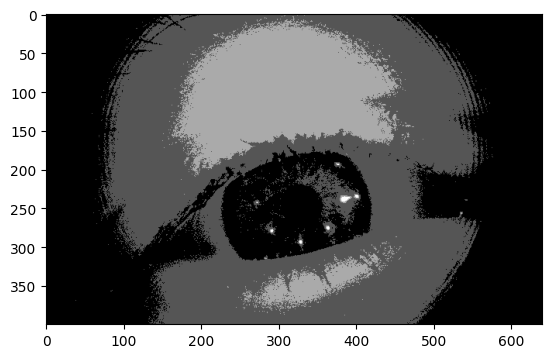

In [5]:
plt.imshow(np.digitize(img, [0, 60, 120, 255], right=False), cmap='gray')

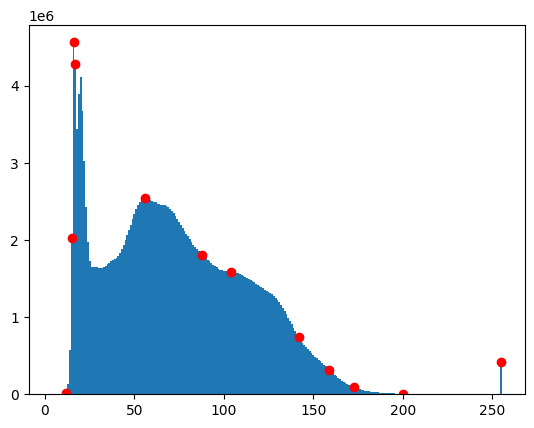

In [6]:
distribution = Counter(total_data)
new_dict = {int(key*255): value for key, value in distribution.items()}
all_peak_height = list(new_dict.values())
x = np.array(list(new_dict.keys()))
plt.bar(x, all_peak_height, width=1)

idx = signal.find_peaks(all_peak_height, distance=17)[0]
peaks = sorted(list(x[idx]))
peak_height = [new_dict[peak] for peak in peaks]
plt.scatter(peaks, peak_height, c='r', )

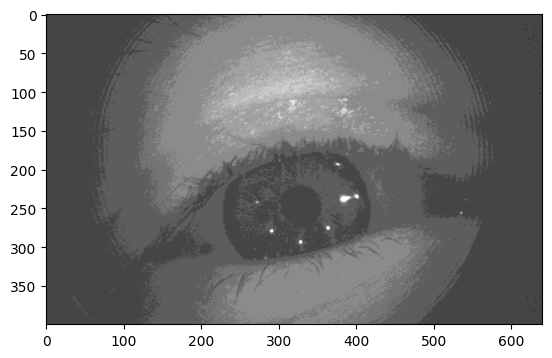

In [7]:
plt.imshow(np.digitize(img, sorted(list(peaks)), right=False), cmap='gray')